# SI 370 - Final Project

In [8]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('Airbnb_Open_Data.csv')

/var/folders/68/v3_3qddj09l6lll90glttwsm0000gq/T/ipykernel_7517/2352466156.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [9]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [10]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## Cleaning and Re-formatting Price Column

In [11]:
import re
def clean_price(price):
    if (type(price) == str):
        return float(re.sub(r'[^\w\s]', '', price[1:]))
    return price

In [12]:
df['price'] = df['price'].apply(lambda x: clean_price(x))

## Cleaning Data

In [21]:
# remove the outlier
drop = df['availability 365'].idxmax()
df = df.drop(labels=drop, axis=0)

In [22]:
# checking neighbourhood group, has some mistakes
df['neighbourhood group'].value_counts()

Manhattan        43790
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [39]:
# removing mistakes in neighbourhood group
drop = []
drop.append((df[df['neighbourhood group'] == 'brookln'].index)[0])
drop.append((df[df['neighbourhood group'] == 'manhatan'].index)[0])
df = df.drop(labels=drop, axis=0)

## Compare Availability with Price

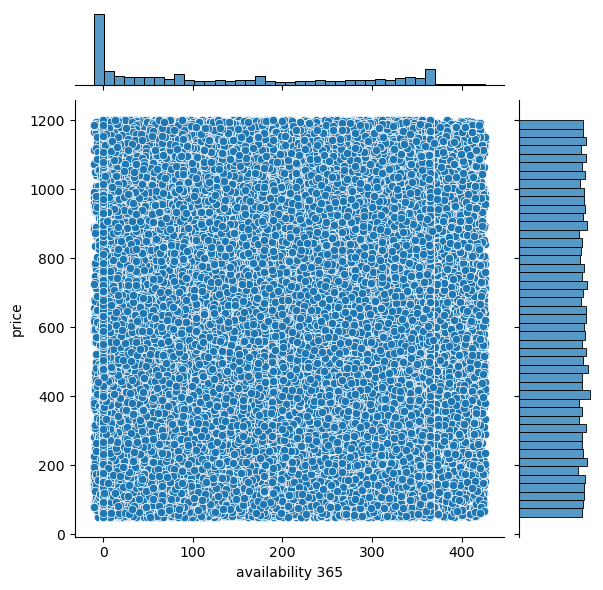

In [26]:
sns.jointplot(data=df, x='availability 365', y='price')

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model0 = smf.ols("Q('availability 365') ~ price", data=df).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('availability 365')   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.095
Date:                   Fri, 11 Nov 2022   Prob (F-statistic):              0.295
Time:                           16:17:35   Log-Likelihood:            -6.4441e+05
No. Observations:                 101900   AIC:                         1.289e+06
Df Residuals:                     101898   BIC:                         1.289e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    141.9157      0.902    157.283      0.000     140.147     143.684
price         -0.0013      0.001     -1.047      0.295      -0.004       0.001
==============================================================================
Omnibus:                   199548.550   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10625.529
Skew:                           0.474   Prob(JB):                         0.00
Kurtosis:                       1.734   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared value of 0, no relation between availability 365 and price which matches the plot.

## Compare Availability with Reviews

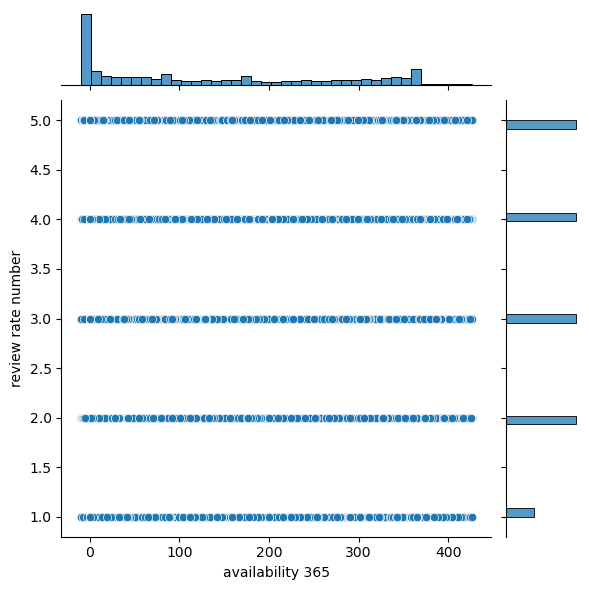

In [48]:
sns.jointplot(data=df, x='availability 365', y='review rate number')

In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model0 = smf.ols("Q('availability 365') ~ Q('review rate number')", data=df).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('availability 365')   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     4.398
Date:                   Fri, 11 Nov 2022   Prob (F-statistic):             0.0360
Time:                           16:23:31   Log-Likelihood:            -6.4401e+05
No. Observations:                 101835   AIC:                         1.288e+06
Df Residuals:                     101833   BIC:                         1.288e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 143.2597      1.159    123.606      0.000     140.988     145.531
Q('review rate number')    -0.6903      0.329     -2.097      0.036      -1.335      -0.045
==============================================================================
Omnibus:                   197200.805   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10625.829
Skew:                           0.475   Prob(JB):                         0.00
Kurtosis:                       1.735   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared value of 0, no relation between review and price which matches the plot.

## Compare Availability with Neighbourhood Group

<AxesSubplot:xlabel='neighbourhood group', ylabel='availability 365'>

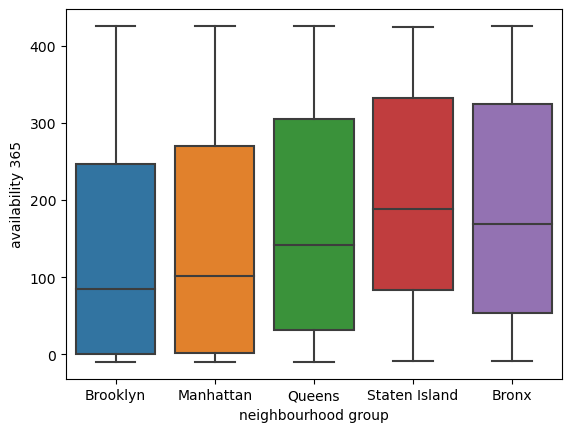

In [42]:
sns.boxplot(x="neighbourhood group",y="availability 365", data=df)

## Compare Review Rate with Neighbourhood Group

<AxesSubplot:xlabel='neighbourhood group', ylabel='review rate number'>

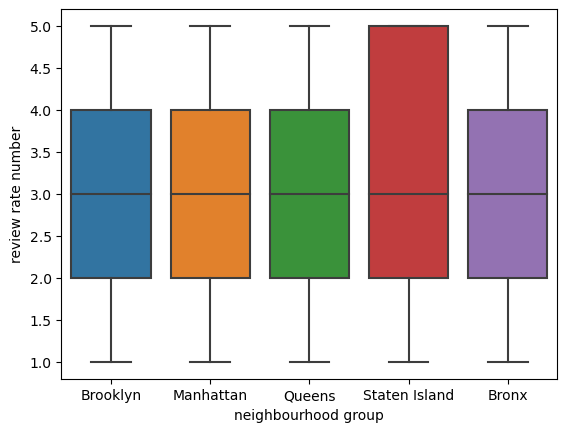

In [51]:
sns.boxplot(x="neighbourhood group",y="review rate number", data=df)